In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%cd /content/drive/MyDrive/diff_repaint/diffusion-anomaly

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-e1616eb332bf>", line 1, in <cell line: 1>
    get_ipython().run_line_magic('cd', '/content/drive/MyDrive/diff_repaint/diffusion-anomaly')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist

In [20]:
!pip install -r requirements.txt
!pip install SimpleITK==2.1.1.1
!pip install blobfile
!pip install visdom

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spi

In [ ]:
! npm install -g localtunnel
get_ipython().system_raw('/usr/local/bin/python -m pip install visdom')
get_ipython().system_raw('/usr/local/bin/python -m visdom.server -port 8850 >> visdomlog.txt 2>&1 &')
get_ipython().system_raw('lt --port 8850 >> url.txt 2>&1 &')

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 2.324s


In [ ]:
MODEL_FLAGS="--image_size 256 --num_channels 128 --class_cond True --num_res_blocks 2 --num_heads 1 --learn_sigma True --use_scale_shift_norm False --attention_resolutions 16"
DIFFUSION_FLAGS="--diffusion_steps 1000 --noise_schedule linear --rescale_learned_sigmas False --rescale_timesteps False"
TRAIN_FLAGS="--lr 1e-4 --batch_size 10"
CLASSIFIER_FLAGS="--image_size 256 --classifier_attention_resolutions 32,16,8 --classifier_depth 4 --classifier_width 32 --classifier_pool attention --classifier_resblock_updown True --classifier_use_scale_shift_norm True"
SAMPLE_FLAGS="--batch_size 1 --num_samples 1 --timestep_respacing ddim1000 --use_ddim True --use_resample False"

In [ ]:
!python scripts/inference.py \
--data_dir /content/drive/MyDrive/diff_repaint/data/test_slices/   \
--model_path ./results/brats2update010000.pt \
--classifier_path ./results/modelbratsclass009999.pt \
--dataset brats --classifier_scale 100 --noise_level 500 \
--mask_path /content/drive/MyDrive/diff_repaint/data/mask_140_140_210_190.png \
--sample_path /content/drive/MyDrive/diff_repaint/diffusion-anomaly/tran_diff_results/ \
$MODEL_FLAGS $DIFFUSION_FLAGS $CLASSIFIER_FLAGS  $SAMPLE_FLAGS

流式输出内容被截断，只能显示最后 5000 行内容。
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 188 189 190 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 187 188 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 186 187 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 184 185 140 141 142 143 144 145 146 147 148 149 150 151 152
 153 154 155 156 157 158 159 160 161 182 183 140 141 142 143 144 145 146
 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 179 180 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 178 141 144 146 147 148 149 150 151 152 153 154 156 157 177]
img_shape[3] [136 137 138 ... 151 152 153]
img_shape[2] [ 60  60  60 ... 195 195 195]
xnoisy torch.Size([1, 4, 256, 256])
indices [498, 497, 496, 495, 494, 493, 492, 491, 490, 489, 488, 487, 486, 485, 484, 483, 482, 481, 480, 479, 478, 477, 4

检查img类型

In [21]:
!python scripts/inference.py \
--data_dir /content/drive/MyDrive/diff_repaint/data/test_slices/   \
--model_path ./results/brats2update010000.pt \
--classifier_path ./results/modelbratsclass009999.pt \
--dataset brats --classifier_scale 100 --noise_level 500 \
--mask_path /content/drive/MyDrive/diff_repaint/data/mask_140_140_210_190.png \
--sample_path /content/drive/MyDrive/diff_repaint/diffusion-anomaly/extend_trans_inference/ \
$MODEL_FLAGS $DIFFUSION_FLAGS $CLASSIFIER_FLAGS  $SAMPLE_FLAGS

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
python3: can't open file 'scripts/inference.py': [Errno 107] Transport endpoint is not connected


Do inference

data_dir是使用的原数据

mask_path是加载的mask的路径

sample_path是最后输出的路径


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import argparse
import os
from visdom import Visdom
viz = Visdom(port=8850) # 初始化Visdom可视化界面，port为8850
import sys
 # 添加当前目录到系统路径
sys.path.append("..")
sys.path.append(".")
from guided_diffusion.bratsloader import BRATSDataset
import torch.nn.functional as F
import numpy as np
import torch as th
import torch.distributed as dist

from guided_diffusion.image_datasets import load_data
from guided_diffusion import dist_util, logger
from guided_diffusion.script_util import (
    NUM_CLASSES,
    model_and_diffusion_defaults,
    classifier_defaults,
    create_classifier,
    create_model_and_diffusion,
    add_dict_to_argparser,
    args_to_dict,
)

def random_translate_diff(diff, mask, area):
    mask = np.array(mask, dtype=np.uint8)

    if len(mask.shape) > 2:
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

    median = np.median(mask)
    lower_threshold = int(max(0, (1.0 - 0.33) * median))
    upper_threshold = int(min(255, (1.0 + 0.33) * median))
    edges = cv2.Canny(mask, lower_threshold, upper_threshold)

    sobelx = cv2.Sobel(edges, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(edges, cv2.CV_64F, 0, 1, ksize=3)
    magnitude = np.sqrt(sobelx**2 + sobely**2)

    def is_inside_boundary(point, magnitude, threshold=100):
        return magnitude[point[1], point[0]] < threshold

    non_zero_coords = np.where(diff > 0.2)
    if non_zero_coords[0].size == 0:
        return np.zeros(area)

    min_y, max_y = np.min(non_zero_coords[0]), np.max(non_zero_coords[0])
    min_x, max_x = np.min(non_zero_coords[1]), np.max(non_zero_coords[1])
    diff_height = max_y - min_y + 1
    diff_width = max_x - min_x + 1

    while True:
        y = np.random.randint(0, mask.shape[0] - diff_height)
        x = np.random.randint(0, mask.shape[1] - diff_width)
        top_left_inside = is_inside_boundary((x, y), magnitude)
        bottom_right_inside = is_inside_boundary((x + diff_width, y + diff_height), magnitude)

        if top_left_inside and bottom_right_inside:
            break

    new_diff = np.zeros(area)
    new_diff[:, :, y:y+diff_height, x:x+diff_width] = diff[min_y:max_y+1, min_x:max_x+1]

    return new_diff

class SimpleNamespace:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)


"""
main函数:
    功能:
        - 根据命令行参数设置模型，加载数据集，加载分类器并进行样本生成。
    输入:
        - 命令行参数 (通过argparse库解析)
    输出:
        - 样本，原始图像，标签和弱标签都保存在一个.npz文件中。
"""
def main():
    args = SimpleNamespace(
        data_dir="/content/drive/MyDrive/diff_repaint/data/test_slices/",
        model_path="./results/brats2update010000.pt",
        classifier_path="./results/modelbratsclass009999.pt",
        dataset="brats",
        classifier_scale=100,
        noise_level=500,
        mask_path="/content/drive/MyDrive/diff_repaint/data/mask_140_140_210_190.png",
        sample_path="/content/drive/MyDrive/diff_repaint/diffusion-anomaly/tran_diff_results/",
        clip_denoised=True,
        num_samples=5000,
        batch_size=32,
        use_ddim=False,
        use_resample=False,
        n_generated_batch=5
        # ... 其他需要的参数
    )
    # 设置分布式计算和日志配置
    dist_util.setup_dist()
    logger.configure()

    logger.log("creating model and diffusion...")
    model, diffusion = create_model_and_diffusion(
        **args_to_dict(args, model_and_diffusion_defaults().keys())
    )
    # 加载数据
    ds = BRATSDataset(args.data_dir, test_flag=True)
    datal = th.utils.data.DataLoader(
        ds,
        batch_size=args.batch_size,
        shuffle=True)
    # 加载模型
    model.load_state_dict(
        dist_util.load_state_dict(args.model_path, map_location="cpu")
    )
    model.to(dist_util.dev())
    if args.use_fp16:
        model.convert_to_fp16()
    model.eval()
    # 加载分类器
    logger.log("loading classifier...")
    classifier = create_classifier(**args_to_dict(args, classifier_defaults().keys()))
    classifier.load_state_dict(
        dist_util.load_state_dict(args.classifier_path)
    )
    # 打印加载的分类器信息和参数数量
    print('loaded classifier')
    p1 = np.array([np.array(p.shape).prod() for p in model.parameters()]).sum()
    p2 = np.array([np.array(p.shape).prod() for p in classifier.parameters()]).sum()
    print('pmodel', p1, 'pclass', p2)
    # 将分类器转移到适当的设备并设置为评估模式
    classifier.to(dist_util.dev())
    if args.classifier_use_fp16:
        classifier.convert_to_fp16()
    classifier.eval()
    # 定义条件函数和模型函数
    def cond_fn(x, t, y=None, gt=None, gt_keep_mask=None):
        assert y is not None
        with th.enable_grad():
            x_in = x.detach().requires_grad_(True)
            logits = classifier(x_in, t)
            log_probs = F.log_softmax(logits, dim=-1)
            selected = log_probs[range(len(logits)), y.view(-1)]
            a = th.autograd.grad(selected.sum(), x_in)[0]
            return a, a * args.classifier_scale

    def model_fn(x, t, y=None, gt=None, gt_keep_mask=None):
        assert y is not None
        return model(x, t, y if args.class_cond else None)

    # The sampling process
    logger.log("sampling...")
    #mask_range = []
    samples = []
    orgs = []
    labels = []
    weak_labels = []
    #moved_masks = []  # 用于存储移动后的masks
    diffs = []
    i = 0
    # 从文件中加载mask并转换为tensor格式
    pil_mask = Image.open(args.mask_path)
    tensor_mask = th.from_numpy(np.array(pil_mask)).float().to(dist_util.dev())
    batch_idx = 0
    # 遍历数据集中的图像
    for img in datal:

        # 初始化一个字典来保存模型的关键字参数
        model_kwargs = {}
        #print('img', img[0].shape, img[1])
        # 创建一个mask来识别图像中的大脑部分
        brain_mask = np.where(img[0] > 0, 1, 0)
        brain_mask_single_channel = th.from_numpy(np.any(brain_mask, axis=1)).float().to(dist_util.dev())
        brain_mask_multi_channel = brain_mask_single_channel.unsqueeze(1).repeat(1, 4, 1, 1)
        # 获取大脑图像的非零坐标，即大脑部分的位置
        non_zero_coords = np.array(np.where(brain_mask))

        # 如果数据集是"brats"，对图像进行进一步处理
        if args.dataset == 'brats':
            Labelmask = th.where(img[3] > 0, 1, 0)
            number = img[4][0]
            # if img[2] == 0:
            #     continue
            if all(element == 1 for element in img[2]):
                continue

        # 如果模型需要类条件，为其设置对应的类标签和其他关键参数
        if args.class_cond:
            # unhealthy -> healthy
            # classes = th.randint(
            #   low=0, high=1, size=(args.batch_size,), device=dist_util.dev()
            # )
            #healthy->unhealthy
            classes = th.randint(
                low=1, high=2, size=(args.batch_size,), device=dist_util.dev()
            )

            # Initialization of model_kwargs. This is used for model conditioning.
            # y: target class as weak labels.
            # gt: original image as the repaint pixel-wise conditioning
            # gt_keep_mask: mask indicating where to generate new partition of the image.
            model_kwargs["y"] = classes
            model_kwargs['gt'] = img[0].to(dist_util.dev())
            model_kwargs['gt_keep_mask'] = tensor_mask * brain_mask_multi_channel

            #print('y', model_kwargs["y"])
        # 根据是否使用ddim选择合适的样本生成函数
        sample_fn = (
            diffusion.p_sample_loop_known if not args.use_ddim else diffusion.ddim_sample_loop_known
        )
        #print('samplefn', sample_fn)
        # 使用所选的函数生成样本
        sample, x_noisy, org = sample_fn(
            model_fn,
            (args.batch_size, 4, args.image_size, args.image_size), img, org=img,
            clip_denoised=args.clip_denoised,
            model_kwargs=model_kwargs,
            cond_fn=cond_fn,
            device=dist_util.dev(),
            noise_level=args.noise_level,
            use_resample=args.use_resample
        )

        #mask_range.append(non_zero_coords)
        samples.append(sample.cpu().numpy())
        orgs.append(org.cpu().numpy())
        labels.append(img[3].cpu().numpy())
        weak_labels.append(img[2].cpu().numpy())
        # print(f"Length of samples: {len(samples)}")
        # print(f"Length of orgs: {len(orgs)}")
        # print(f"Length of labels: {len(labels)}")
        # print(f"Length of weak_labels: {len(weak_labels)}")


        samples_array = np.concatenate(samples, axis=0)
        orgs_array = np.concatenate(orgs, axis=0)
        labels_array = np.concatenate(labels, axis=0)
        weak_labels_array = np.concatenate(weak_labels, axis=0)
        print("sample array shape", samples_array.shape)
        diffs = []
        #diffs_distribution = []
        # sample 是推理后的结果
        print("shape of sample:", samples_array.shape)
        #print("sample:", samples_array)
        print("shape of orgs:", orgs_array.shape)
        current_diff = np.sum(abs(samples_array[0] - orgs_array[0]), axis=0)
        mask_area = np.where(orgs_array > 0.2)    #
        #print("shape of mask_area:", mask_area.shape)
        #mask_non_zero_coords = np.array(np.where(mask_area))
        #print("Shape of mask_non_zero_coords:", mask_non_zero_coords.shape)

        print("Shape of diff:", current_diff.shape)
        translated_diff = random_translate_diff(current_diff,  mask_area, img[0].shape)

        # 将平移后的差异图像添加到diffs列表中。
        diffs.append(translated_diff)

        diffs_array = np.stack(diffs, axis=0)
        save_path = f"{args.sample_path}_batch_{batch_idx}.npz"
        np.savez(save_path,
         samples=samples_array,
         orgs=orgs_array,
         labels=labels_array,
         weak_labels=weak_labels_array,
         translated_diffs=diffs_array
        )

        samples.clear()
        orgs.clear()
        labels.clear()
        weak_labels.clear()
        # samples_array.clear()
        # orgs_array.clear()
        # labels_array.clear()
        # weak_labels_array.clear()
        # diffs_array.clear()
        batch_idx += 1
        i += 1





"""
create_argparser函数:
    功能:
        - 创建一个用于解析命令行参数的解析器。
    输入:
        - 无
    输出:
        - argparse.ArgumentParser对象，用于解析命令行参数。
"""
def create_argparser():
    defaults = dict(
        data_dir="",
        clip_denoised=True,
        num_samples=5000,
        batch_size=32,   ###1
        use_ddim=False,
        model_path="",
        classifier_path="",
        classifier_scale=100,
        noise_level=500,
        dataset='brats',
        mask_path="",
        use_resample=False,
        n_generated_batch=5,
        sample_path=""
    )
    defaults.update(model_and_diffusion_defaults())
    defaults.update(classifier_defaults())
    parser = argparse.ArgumentParser()
    add_dict_to_argparser(parser, defaults)
    return parser

if __name__ == "__main__":
    main()

Logging to ./results
creating model and diffusion...


AttributeError: ignored

In [ ]:
!python scripts/inference.py \
--data_dir /content/drive/MyDrive/diff_repaint/data/test/   \
--model_path ./results/brats2update010000.pt \
--classifier_path ./results/modelbratsclass009999.pt \
--dataset brats --classifier_scale 100 --noise_level 500 \
--mask_path /content/drive/MyDrive/diff_repaint/data/mask_140_140_210_190.png \
--sample_path /content/drive/MyDrive/diff_repaint/diffusion-anomaly/tran_diff_results \
$MODEL_FLAGS $DIFFUSION_FLAGS $CLASSIFIER_FLAGS  $SAMPLE_FLAGS

python3: can't open file '/content/scripts/inference.py': [Errno 2] No such file or directory


In [ ]:
import os
import numpy as np

folder_path = "/content/drive/MyDrive/diff_repaint/diffusion-anomaly/u_tran_diff"

all_files = os.listdir(folder_path)

npz_files = [f for f in all_files if f.endswith('.npz')][:100]

loaded_data_list = []

for file_name in npz_files:
    file_path = os.path.join(folder_path, file_name)
    loaded_data = np.load(file_path)
    loaded_data_list.append(loaded_data)

print(loaded_data_list[0]['labels'].shape)


(1, 1, 256, 256)


"labels"中的所有元素都是0。

In [ ]:
import os
import numpy as np

folder_path = '/content/drive/MyDrive/diff_repaint/diffusion-anomaly/tran_diff_results'
all_files = os.listdir(folder_path)
npz_files = [f for f in all_files if f.endswith('.npz')]
npz_files = npz_files[:50]

for i, file_name in enumerate(npz_files):
    file_path = os.path.join(folder_path, file_name)
    loaded_data = np.load(file_path)  # 注意：这里我把变量名从data改为了loaded_data
    #print(f"File {i+1}: {file_name}")

    # 检查loaded_data的数据类型
    #print("Loaded Data Type:", type(loaded_data))

    for key in loaded_data.files:
        #print(f"  Index: {key}, Shape: {loaded_data[key].shape}")

    # 检查loaded_data字典中"label"键是否存在
     if "labels" in loaded_data:
        print("'labels' key exists.")
     else:
        print("'labels' key does not exist.")

    # 检查loaded_data["labels"]的数据类型
    #print("Labels Data Type:", type(loaded_data["labels"]))

    # 检查loaded_data["labels"]的维度
    #print("Labels Shape:", loaded_data["labels"].shape)

    # 检查loaded_data["labels"]的数据类型（例如，float32, int32等）
    #print("Labels Data Type:", loaded_data["labels"].dtype)

    # 在这里，'index'需要被指定或计算
    index = 0  # 例如，你可以设置index = 0或通过其他方式得到
    # 检查index是否在合适的范围内
    if index < loaded_data["labels"].shape[0]:
        print(f"Index {index} is valid.")
    else:
        print(f"Index {index} is out of bounds.")

    diff_range = loaded_data["samples"]-loaded_data["labels"]

    # print("samples:", loaded_data["samples"])
    # print("Shape of samples:", loaded_data["samples"].shape)
    #打印 diff_range 和其形状
    print("diff_range:", diff_range)
    print("Shape of diff_range:", diff_range.shape)

    # 打印原始标签的一些统计信息
    # original_labels = loaded_data["labels"][index, 0, :, :]
    # print("Original Labels Min:", original_labels.min())
    # print("Original Labels Max:", original_labels.max())
    # print("Original Labels Mean:", original_labels.mean())
    # print("Original Labels Std:", original_labels.std())


'labels' key exists.
'labels' key exists.
'labels' key exists.
'labels' key exists.
'labels' key exists.
Index 0 is valid.
diff_range: [[[[-8.71379860e-03 -9.34532844e-04  4.09660861e-04 ... -1.36421574e-03
     2.05766410e-05 -2.33658962e-03]
   [-1.17625017e-03 -4.73642349e-03 -1.39388349e-03 ... -1.90567109e-03
     9.50759626e-04 -3.68926674e-03]
   [-3.41702253e-06  7.83883035e-04  1.52438320e-03 ... -1.08272000e-03
    -1.26106781e-04  9.88590997e-04]
   ...
   [ 8.86782072e-06 -7.17325136e-04  5.17422333e-04 ... -2.69294251e-04
    -8.06043856e-04  8.81284010e-04]
   [ 2.67150463e-04 -1.63167249e-03 -4.08897176e-04 ... -9.80768353e-04
     8.63433816e-05  2.64044851e-04]
   [ 4.07898286e-03 -4.12057620e-04 -4.39137686e-04 ... -8.50093784e-04
    -5.72455348e-04 -2.47479044e-03]]

  [[-6.19337615e-03  3.66546959e-03  2.15570698e-03 ... -8.91677104e-04
    -1.75776007e-03  1.04786502e-03]
   [-9.37113538e-04  1.63782854e-04 -8.07441771e-04 ... -1.36455102e-03
     1.49509870e-04 -

In [ ]:
import os
import numpy as np

# 指定目录路径
dir_path = '/content/drive/MyDrive/diff_repaint/data/test/test_batch_1.npz'
# 加载 .npz 文件
data = np.load(file_path)

# 打印文件名
print(f"File: {filename}")

# 打印每个数组的维度和索引（键）
for key in data.files:
    print(f"  Key: {key}, Shape: {data[key].shape}")
# # 列出目录下的所有文件
# files = os.listdir(dir_path)

# # 设置计数器
# counter = 0

# # 遍历文件，找出所有 .npz 文件
# for filename in files:
#     if filename.endswith('.npz'):
#         if counter >= 50:
#             break  # 如果已经打印了50个文件，就退出循环

#         file_path = os.path.join(dir_path, filename)

#         # 加载 .npz 文件
#         data = np.load(file_path)

#         # 打印文件名
#         print(f"File: {filename}")

#         # 打印每个数组的维度和索引（键）
#         for key in data.files:
#             print(f"  Key: {key}, Shape: {data[key].shape}")

#         # 更新计数器
#         counter += 1




File: test_slice_11539.npz
  Key: image, Shape: (4, 256, 256)
  Key: label, Shape: (256, 256)
  Key: weak_label, Shape: ()


In [ ]:
import os
import numpy as np

# 指定目录路径
dir_path = '/content/drive/MyDrive/diff_repaint/data/train'

# 列出目录下的所有文件
files = os.listdir(dir_path)

# 设置计数器
counter = 0

# 遍历文件，找出所有 .npz 文件
for filename in files:
    if filename.endswith('.npz'):
        if counter >= 50:
            break  # 如果已经打印了50个文件，就退出循环

        file_path = os.path.join(dir_path, filename)

        # 加载 .npz 文件
        data = np.load(file_path)

        # 打印文件名
        print(f"File: {filename}")

        # 打印每个数组的维度和索引（键）
        for key in data.files:
            print(f"  Key: {key}, Shape: {data[key].shape}")

        # 更新计数器
        counter += 1




File: train_batch_0.npz
  Key: images, Shape: (5000, 4, 256, 256)
  Key: labels, Shape: (5000, 256, 256)
  Key: weak_labels, Shape: (5000,)
File: train_batch_1.npz
  Key: images, Shape: (5000, 4, 256, 256)
  Key: labels, Shape: (5000, 256, 256)
  Key: weak_labels, Shape: (5000,)
File: train_batch_2.npz
  Key: images, Shape: (5000, 4, 256, 256)
  Key: labels, Shape: (5000, 256, 256)
  Key: weak_labels, Shape: (5000,)
File: train_batch_3.npz
  Key: images, Shape: (5000, 4, 256, 256)
  Key: labels, Shape: (5000, 256, 256)
  Key: weak_labels, Shape: (5000,)
File: train_batch_4.npz
  Key: images, Shape: (5000, 4, 256, 256)
  Key: labels, Shape: (5000, 256, 256)
  Key: weak_labels, Shape: (5000,)
File: train_batch_5.npz
  Key: images, Shape: (5000, 4, 256, 256)
  Key: labels, Shape: (5000, 256, 256)
  Key: weak_labels, Shape: (5000,)
File: train_batch_6.npz
  Key: images, Shape: (5000, 4, 256, 256)
  Key: labels, Shape: (5000, 256, 256)
  Key: weak_labels, Shape: (5000,)
File: train_batch_7.

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_ubyte


def visualize(loaded_data, index, channel):
    print(loaded_data["weak_labels"][index])

    fig = plt.figure(figsize=(15, 10))

    ax = plt.subplot(3, 3, 1)
    ax.imshow(loaded_data["samples"][index, channel, :, :], cmap='gray')
    ax.set_title('Samples')
    plt.axis("off")

    ax = plt.subplot(3, 3, 2)
    ax.imshow(loaded_data["orgs"][index, channel, :, :], cmap='gray')
    ax.set_title('Orgs')
    plt.axis("off")

    ax = plt.subplot(3, 3, 3)
    ax.imshow(loaded_data["labels"][index, 0, :, :])
    ax.set_title('Labels')
    plt.axis("off")

    # binary_labels = img_as_ubyte(loaded_data["labels"][index, 0, :, :] > 0.2)
    # print("Binary Labels Data Type:", binary_labels.dtype)
    # print("Binary Labels Shape:", binary_labels.shape)
    # print("Binary Labels Structure:", binary_labels)
    # ax = plt.subplot(3, 3, 3)
    # ax.imshow(binary_labels, cmap='gray')
    # ax.set_title('Binary Labels')
    # plt.axis("off")

    ax = plt.subplot(3, 3, 4)
    diff = np.sum(abs(loaded_data["samples"][index, ...] - loaded_data["orgs"][index, ...]), axis=0)
    ax.imshow(diff)
    ax.set_title('Difference')
    plt.axis("off")

    ax = plt.subplot(3, 3, 5)
    ax.imshow(loaded_data["translated_diffs"][index, 0, channel, :, :], cmap='gray')
    ax.set_title('Translated_diffs')
    plt.axis("off")

    plt.tight_layout()
    plt.show()

    # 叠加translated_diffs和orgs
    overlaid_image = loaded_data["translated_diffs"][index, 0, channel, :, :], 0, 1) + np.clip(loaded_data["orgs"][index, channel, :, :]

    # 显示叠加后的图片
    ax = plt.subplot(3, 3, 6)
    ax.imshow(overlaid_image, cmap='gray')
    ax.set_title('Overlaid: Orgs + Translated_diffs')
    plt.axis("off")
    plt.tight_layout()
    plt.show()

folder_path = '/content/drive/MyDrive/diff_repaint/diffusion-anomaly/u_tran_diff'

all_files = os.listdir(folder_path)

npz_files = [f for f in all_files if f.endswith('.npz')]

npz_files = npz_files[:50]

for i, file_name in enumerate(npz_files):
    file_path = os.path.join(folder_path, file_name)

    data = np.load(file_path)

    print(f"File {i+1}: {file_name}")
    for key in data.files:
        print(f"  Index: {key}, Shape: {data[key].shape}")
    visualize(data, index=0, channel=0)


In [ ]:
import matplotlib.pyplot as plt

def visualize(loaded_data, index, channel):
    print(loaded_data["weak_labels"][index])

    fig = plt.figure(figsize=(15, 10))

    # 显示samples
    ax = plt.subplot(3, 3, 1)
    ax.imshow(loaded_data["samples"][index, channel, :, :], cmap='gray')
    ax.set_title('Samples')
    plt.axis("off")

    # 显示orgs
    ax = plt.subplot(3, 3, 2)
    ax.imshow(loaded_data["orgs"][index, channel, :, :], cmap='gray')
    ax.set_title('Orgs')
    plt.axis("off")

    # 显示labels
    ax = plt.subplot(3, 3, 3)
    ax.imshow(loaded_data["labels"][index, 0, :, :])
    ax.set_title('Labels')
    plt.axis("off")

    # 显示差异
    ax = plt.subplot(3, 3, 4)
    diff = np.sum(abs(loaded_data["samples"][index, ...] - loaded_data["orgs"][index, ...]), axis=0)
    ax.imshow(diff)
    ax.set_title('Difference')
    plt.axis("off")

    # 显示translated_diffs
    ax = plt.subplot(3, 3, 5)
    ax.imshow(loaded_data["translated_diffs"][index, 0, channel, :, :], cmap='gray')
    ax.set_title('Translated_diffs')
    plt.axis("off")

    plt.tight_layout()
    plt.show()


0


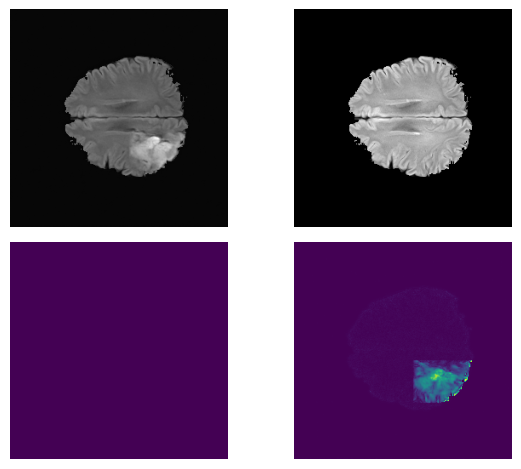

In [ ]:
visualize(loaded_data, 4, 3)

In [ ]:
from PIL import Image
def multi_visualize(loaded_data, index, channel):
    print(loaded_data["weak_labels"][index])
    fig = plt.figure()
    plt.imshow(loaded_data["samples"][1, channel, :, :], cmap='gray')
    plt.axis("off")

    fig2 = plt.figure()
    plt.imshow(loaded_data["orgs"][index, channel, :, :], cmap='gray')
    plt.axis("off")

    fig3 = plt.figure()
    diff = np.sum(abs(loaded_data["samples"][1, ...] - loaded_data["orgs"][index, ...]), axis=0)
    plt.imshow(diff)
    plt.axis("off")

    fig4 = plt.figure()
    pil_image = Image.open('/content/drive/MyDrive/diff_repaint/data/mask_free_form.png')
    mask = np.array(pil_image)
    plt.imshow(loaded_data["orgs"][index, channel, :, :], cmap='gray')
    plt.imshow(mask, cmap='gray', alpha=0.5)
    plt.axis("off")


0


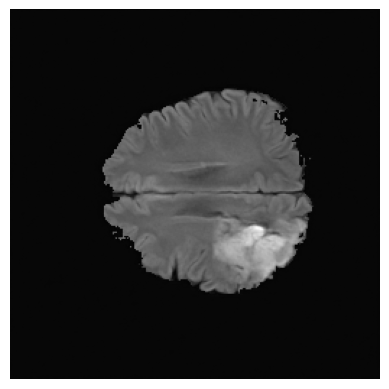

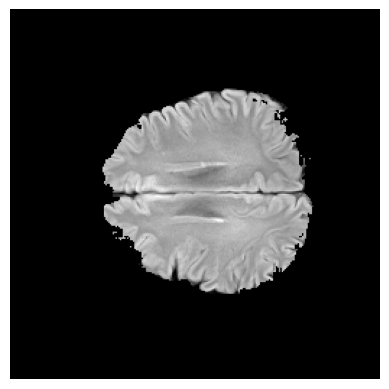

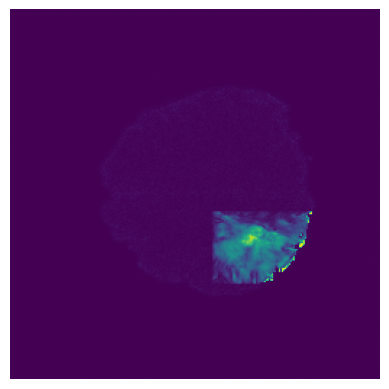

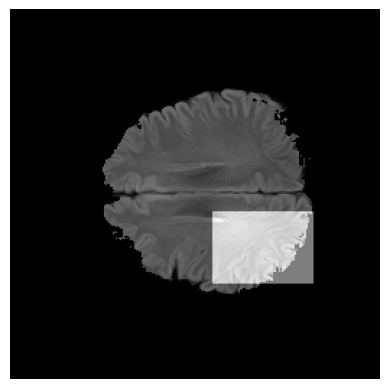

In [ ]:
multi_visualize(loaded_data, 4, 3)

In [ ]:
!python scripts/sample_free_form.py \
--data_dir /content/drive/MyDrive/diff_repaint/data/test_slices/   \
--model_path ./results/brats2update010000.pt \
--classifier_path ./results/modelbratsclass009999.pt \
--dataset brats --classifier_scale 100 --noise_level 500 \
--mask_path /content/drive/MyDrive/diff_repaint/data/mask_free_form_fig1.png \
--sample_path /content/drive/MyDrive/diff_repaint/diffusion-anomaly/results/samples_free_form_fig1.npz \
$MODEL_FLAGS $DIFFUSION_FLAGS $CLASSIFIER_FLAGS  $SAMPLE_FLAGS

Setting up a new session...
port2 50383
Logging to ./results
creating model and diffusion...
timestepresp1 ddim1000
numberinchannels 4
steps 1000 ddim1000
num_timesteps 1000
desired_cound 1000
self.orig 1000
use_timesteps {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 17

(-0.5, 255.5, 255.5, -0.5)

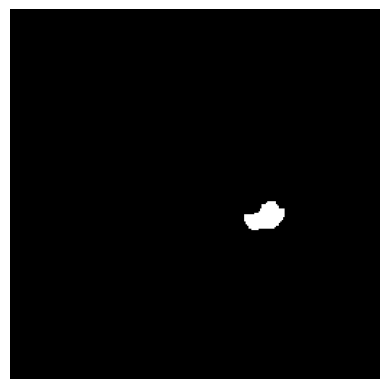

In [ ]:
from PIL import Image
pil_image = Image.open('/content/drive/MyDrive/diff_repaint/data/mask_free_form_fig1.png')
numpy_image = np.array(pil_image)
fig = plt.figure()
plt.imshow(numpy_image, cmap='gray')
plt.axis("off")

In [ ]:
path = "/content/drive/MyDrive/diff_repaint/diffusion-anomaly/results/samples_free_form_fig1.npz"
loaded_data_new = np.load(path)
print(loaded_data_new['samples'].shape)

(2, 4, 256, 256)


0


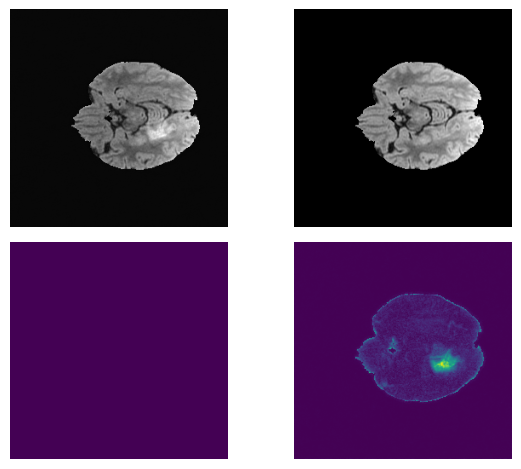

In [ ]:
visualize(loaded_data_new, 0, 3)

0


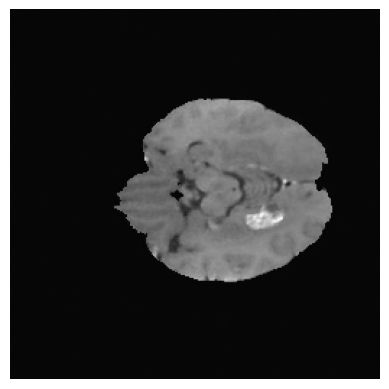

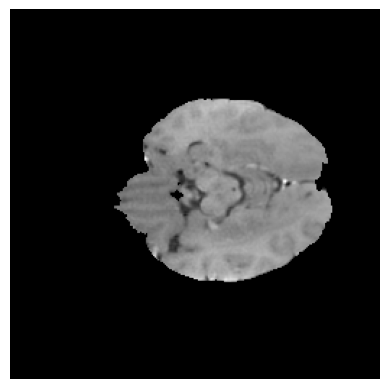

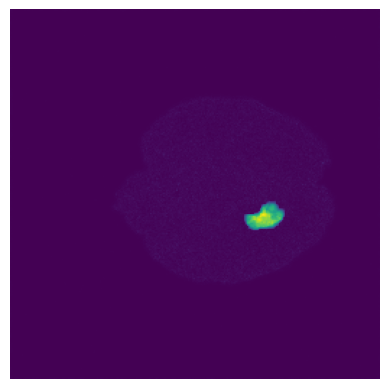

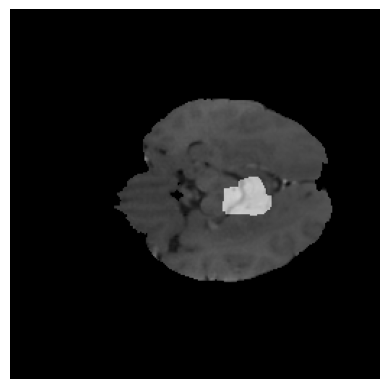

In [ ]:
multi_visualize(loaded_data_new, 0, 1)

In [ ]:
path = "/content/drive/MyDrive/diff_repaint/diffusion-anomaly/results/samples_1.npz"
loaded_data_new = np.load(path)
print(loaded_data_new['labels'].shape)

(1, 1, 256, 256)


0


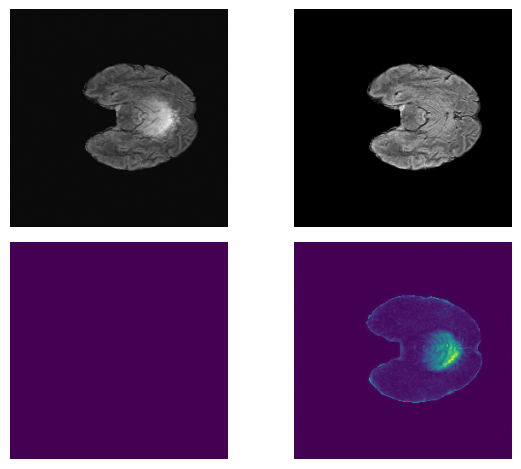

In [ ]:
visualize(loaded_data_new, 0, 3)

In [ ]:
diff = np.sum(abs(loaded_data_new["samples"][0, ...] - loaded_data_new["orgs"][0, ...]), axis=0)
print(diff)

[[0.0177462  0.00621467 0.00518692 ... 0.0031246  0.00422454 0.02135107]
 [0.01032269 0.00315179 0.00185876 ... 0.00460774 0.00542007 0.00885675]
 [0.00486876 0.00434634 0.00273917 ... 0.00163012 0.00410902 0.00680412]
 ...
 [0.00645835 0.00267835 0.00211136 ... 0.00212101 0.00259123 0.0047221 ]
 [0.007534   0.0051212  0.00106201 ... 0.00242926 0.00616534 0.00245638]
 [0.01251936 0.01020537 0.00749209 ... 0.00824924 0.00613788 0.02070219]]


(-0.5, 255.5, 255.5, -0.5)

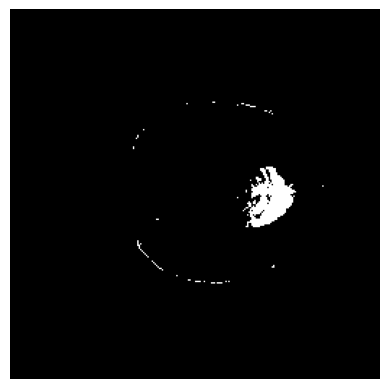

In [ ]:
from skimage import filters
fig = plt.figure()
diff_normalized = diff / np.max(diff)
threshold = 0.4
# threshold = filters.threshold_otsu(diff)
segmented = diff_normalized > threshold
plt.imshow(segmented, cmap='gray')
plt.axis("off")


In [ ]:
import cv2
# Find all contours
segmented = (segmented * 255).astype(np.uint8)
contours, _ = cv2.findContours(segmented, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Filter out small blobs
min_area = 50  # Minimum area to be considered a valid blob
large_blobs = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Create an empty mask to store the filtered blobs
filtered_mask = np.zeros_like(segmented)

# Draw the filtered blobs on the mask
cv2.drawContours(filtered_mask, large_blobs, -1, (255), thickness=cv2.FILLED)

# Smooth the edges using morphological operations
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(filtered_mask, cv2.MORPH_OPEN, kernel, iterations = 2)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations = 2)

In [ ]:
print(np.max(closing))

255


In [ ]:
!python scripts/sample_enlarge.py \
--data_dir /content/drive/MyDrive/diff_repaint/data/test_slices/   \
--model_path ./results/brats2update010000.pt \
--classifier_path ./results/modelbratsclass009999.pt \
--dataset brats --classifier_scale 100 --noise_level 500 \
--sample_path /content/drive/MyDrive/diff_repaint/diffusion-anomaly/results/samples_enlarge.npz \
$MODEL_FLAGS $DIFFUSION_FLAGS $CLASSIFIER_FLAGS  $SAMPLE_FLAGS

Setting up a new session...
port2 59819
Logging to ./results
creating model and diffusion...
timestepresp1 ddim1000
numberinchannels 4
steps 1000 ddim1000
num_timesteps 1000
desired_cound 1000
self.orig 1000
use_timesteps {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 17

In [ ]:
path = "/content/drive/MyDrive/diff_repaint/diffusion-anomaly/results/samples_enlarge.npz"
loaded_data_new = np.load(path)
print(loaded_data_new['labels_new'].shape)

(1, 256, 256)


In [ ]:
from PIL import Image
def multi_visualize_diff_size(loaded_data, channel):
    print(loaded_data["weak_labels"])
    fig = plt.figure()
    plt.imshow(loaded_data["orgs"][0, channel, :, :], cmap='gray')
    plt.axis("off")

    fig2 = plt.figure()
    plt.imshow(loaded_data["labels"][0, :, :], cmap='gray')
    plt.axis("off")

    fig3 = plt.figure()
    plt.imshow(loaded_data["samples"][0, channel, :, :], cmap='gray')
    plt.axis("off")

    fig4 = plt.figure()
    plt.imshow(loaded_data["labels_new"][0, :, :], cmap='gray')
    plt.axis("off")

    fig5 = plt.figure()
    diff = np.sum(abs(loaded_data["samples"][0, ...] - loaded_data["orgs"][0, ...]), axis=0)
    plt.imshow(diff)
    plt.axis("off")

In [ ]:
print(np.max(loaded_data_new["labels"][0, :, :]))

4.0


[1]


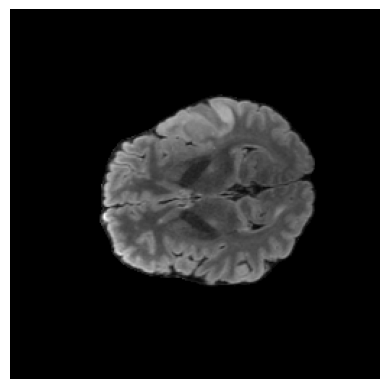

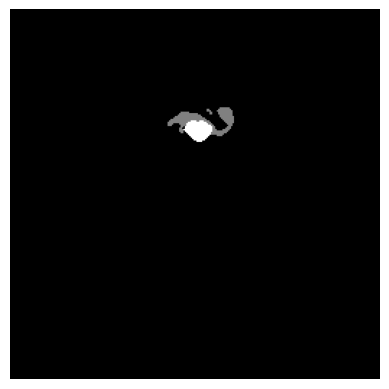

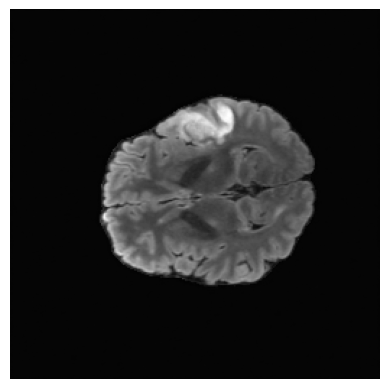

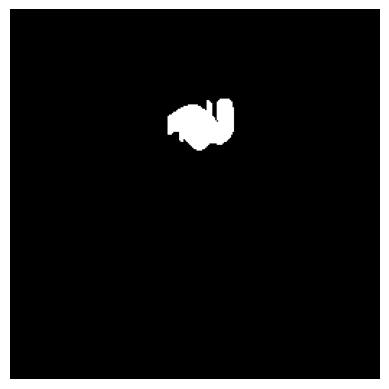

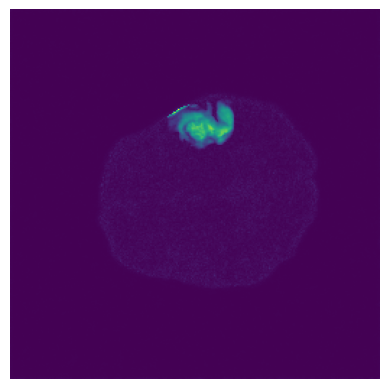

In [ ]:
multi_visualize_diff_size(loaded_data_new, 3)

In [ ]:
!python scripts/sample_reduce.py \
--data_dir /content/drive/MyDrive/diff_repaint/data/test_slices/   \
--model_path ./results/brats2update010000.pt \
--classifier_path ./results/modelbratsclass009999.pt \
--dataset brats --classifier_scale 100 --noise_level 500 \
--sample_path /content/drive/MyDrive/diff_repaint/diffusion-anomaly/results/samples_reduce.npz \
$MODEL_FLAGS $DIFFUSION_FLAGS $CLASSIFIER_FLAGS  $SAMPLE_FLAGS

Setting up a new session...
port2 43163
Logging to ./results
creating model and diffusion...
timestepresp1 ddim1000
numberinchannels 4
steps 1000 ddim1000
num_timesteps 1000
desired_cound 1000
self.orig 1000
use_timesteps {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 17

In [ ]:
path = "/content/drive/MyDrive/diff_repaint/diffusion-anomaly/results/samples_reduce.npz"
loaded_data_new = np.load(path)
print(loaded_data_new['labels_new'].shape)

(1, 256, 256)


[1]


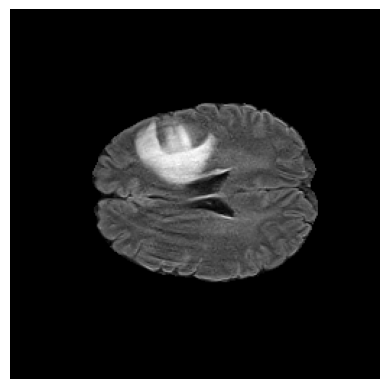

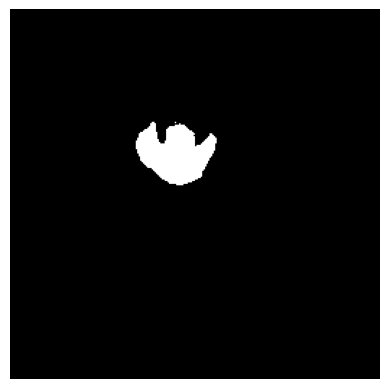

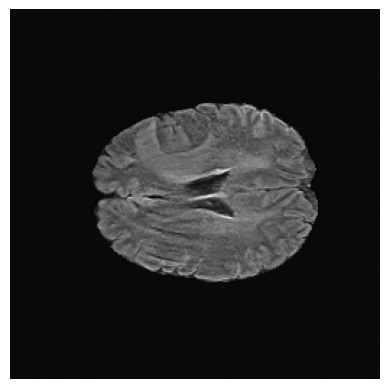

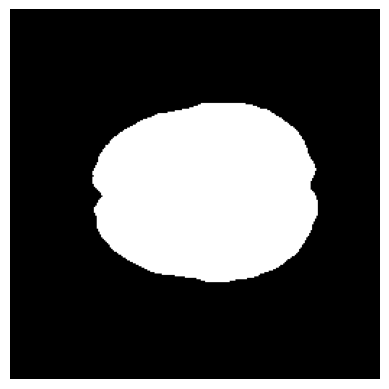

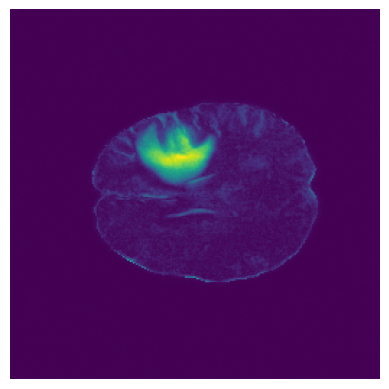

In [ ]:
multi_visualize_diff_size(loaded_data_new, 3)